In [2]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.applications import MobileNetV2
import matplotlib.pyplot as plt

In [3]:
IMG_SIZE = 224;
N_CHANNELS = 3;
ALPHA = 1;
batch_size = 32;

In [4]:
def resize(image, label):
    resized = tf.image.resize(image, size)
    return resized, label
def onehot(image, label):
    label = tf.one_hot(label, NUM_CLASSES)
    return image, label

In [5]:
NUM_CLASSES = 10;
size = (IMG_SIZE,IMG_SIZE);


(ds_train, ds_test), ds_info = tfds.load(
    "imagenette", split=['train','validation'], with_info=True, as_supervised=True
)

ds_train = ds_train.map(resize, num_parallel_calls=8)
ds_train = ds_train.map(onehot, num_parallel_calls=8)
ds_train = ds_train.batch(batch_size=batch_size, drop_remainder=True)

ds_test = ds_test.map(resize, num_parallel_calls=8)
ds_test = ds_test.map(onehot, num_parallel_calls=8)
ds_test = ds_test.batch(batch_size=batch_size, drop_remainder=True)

ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

In [6]:
MBNet = MobileNetV2(
    include_top=True,
    weights=None,
    alpha=ALPHA,
    classes=10,
    input_shape=(IMG_SIZE,IMG_SIZE,N_CHANNELS),
)
model = MBNet
model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

In [7]:
print(model.layers[0].get_input_shape_at(0))
print(model.layers[-1].get_output_shape_at(0))
print(np.size(model.layers))

(None, 224, 224, 3)
(None, 10)
156


In [8]:
epochs = 20
hist = model.fit(ds_train, epochs=epochs, validation_data=ds_test, verbose=2)

Epoch 1/20
295/295 - 57s - loss: 1.7862 - accuracy: 0.3873 - val_loss: 2.4231 - val_accuracy: 0.1002 - 57s/epoch - 194ms/step
Epoch 2/20
295/295 - 32s - loss: 1.3423 - accuracy: 0.5579 - val_loss: 2.6412 - val_accuracy: 0.1012 - 32s/epoch - 107ms/step
Epoch 3/20
295/295 - 32s - loss: 1.0982 - accuracy: 0.6388 - val_loss: 2.8411 - val_accuracy: 0.1012 - 32s/epoch - 107ms/step
Epoch 4/20
295/295 - 32s - loss: 0.9294 - accuracy: 0.6954 - val_loss: 3.0373 - val_accuracy: 0.1012 - 32s/epoch - 108ms/step
Epoch 5/20
295/295 - 32s - loss: 0.8122 - accuracy: 0.7333 - val_loss: 3.2668 - val_accuracy: 0.1012 - 32s/epoch - 107ms/step
Epoch 6/20
295/295 - 32s - loss: 0.7223 - accuracy: 0.7637 - val_loss: 3.2805 - val_accuracy: 0.0989 - 32s/epoch - 107ms/step
Epoch 7/20
295/295 - 32s - loss: 0.6532 - accuracy: 0.7811 - val_loss: 3.2449 - val_accuracy: 0.0989 - 32s/epoch - 107ms/step
Epoch 8/20
295/295 - 32s - loss: 0.5637 - accuracy: 0.8087 - val_loss: 3.1172 - val_accuracy: 0.1012 - 32s/epoch - 107

Text(0, 0.5, 'Accuracy')

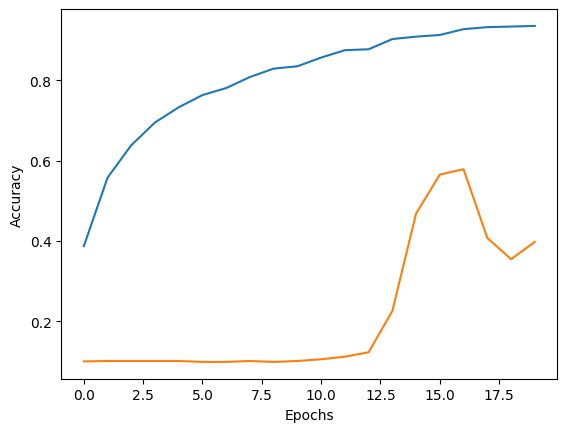

In [15]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

In [22]:
model.summary(layer_range=['input_1','input_1'])

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
Total params: 2,270,794
Trainable params: 2,236,682
Non-trainable params: 34,112
__________________________________________________________________________________________________
